In [2]:
import sys
sys.path.insert(0, '../src')

from megs.model.mPCA import mPCA
from megs.data import image, DataLoader, Galaxy

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

import numpy as np
import pickle
from tqdm import trange
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
import os


In [7]:
# Load model from pickle
with open("2dmorphmodel400.pkl", 'rb') as f:
    mm2D = pickle.load(f)
    
    
with open("galaxy_mPCA.pkl", 'rb') as f:
    mm3D = pickle.load(f)

In [8]:
mm2D.pca.explained_variance_ratio_.shape

(400,)

In [12]:
evr_2d_cumsum = np.cumsum(mm2D.pca.explained_variance_ratio_)
evr_3d_cumsum = np.cumsum(mm3D["pca"].explained_variance_ratio_)

n_comp = len(evr_2d_cumsum)

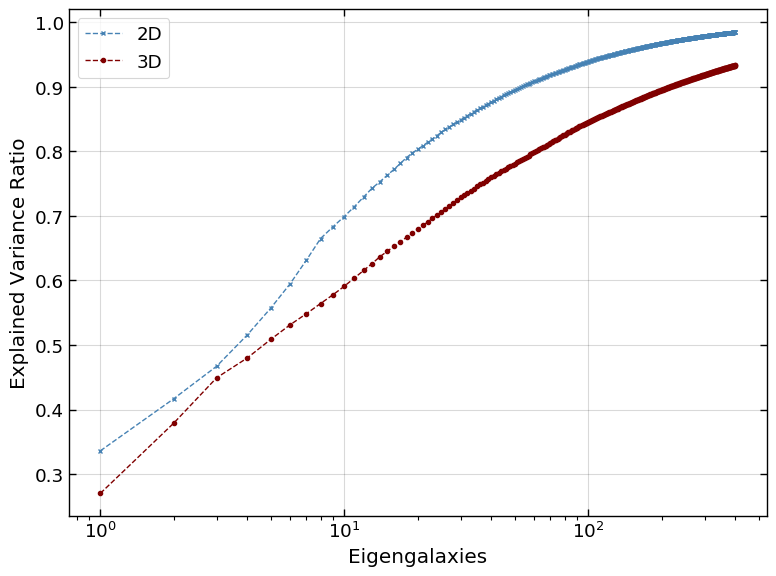

In [29]:
plt.figure(figsize=(8,6))
n_comp = 400
plt.plot(np.arange(1,n_comp+1), evr_2d_cumsum, marker="x", color="steelblue", linestyle="dashed", linewidth=1, markersize=3,label = "2D")
plt.plot(np.arange(1,n_comp+1), evr_3d_cumsum, marker="o", color="maroon", linestyle="dashed", linewidth=1, markersize=3,label = "3D")
plt.xlabel("Eigengalaxies")
plt.ylabel("Explained Variance Ratio")
plt.grid()
plt.tick_params(bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='black', grid_alpha=0.15)
plt.xscale("log")
plt.legend()
plt.tight_layout()
plt.savefig("plots/evr_2d_and_3d.pdf", dpi=300)

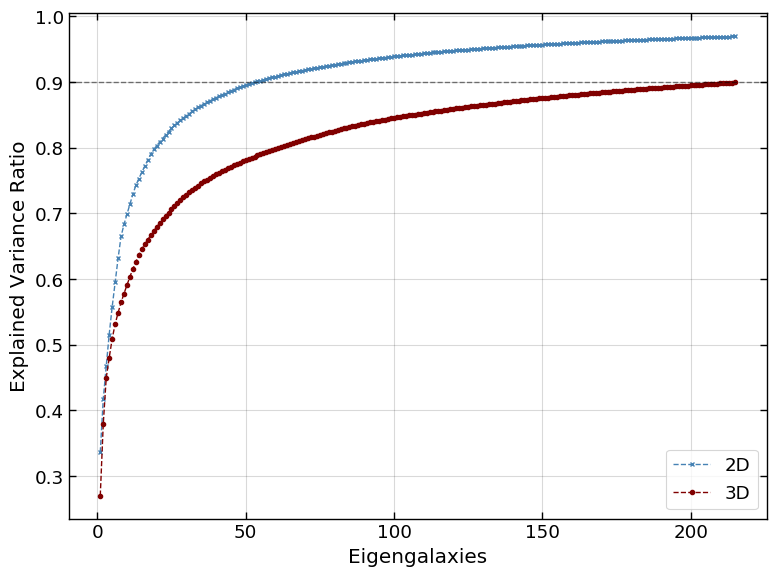

In [27]:
plt.figure(figsize=(8,6))

n_comp = 215

plt.plot(np.arange(1,n_comp+1), evr_2d_cumsum[:n_comp], marker="x", color="steelblue", linestyle="dashed", linewidth=1, markersize=3,label = "2D")
plt.plot(np.arange(1,n_comp+1), evr_3d_cumsum[:n_comp], marker="o", color="maroon", linestyle="dashed", linewidth=1, markersize=3,label = "3D")
plt.xlabel("Eigengalaxies")
plt.ylabel("Explained Variance Ratio")
plt.grid()
plt.tick_params(bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='black', grid_alpha=0.15)
plt.legend()

# horizontal dashed line at 0.9

plt.axhline(y=0.9, color='k', linestyle='--', linewidth=1, alpha = 0.5)

plt.tight_layout()
plt.savefig("plots/evr_2d_and_3d_upto_215.pdf", dpi=300, bbox_inches = "tight")

In [30]:
# Calculate how much eigengalaxies are needed to explain 90% of the variance
print("2D: ", np.where(evr_2d_cumsum > 0.9)[0][0])
print("3D: ", np.where(evr_3d_cumsum > 0.9)[0][0])

2D:  53
3D:  216
